In [8]:
import pandas as pd
data_new = pd.read_pickle('vectorized_questions.pkl')


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
def find_similarity(row):
     return cosine_similarity([row['question1_vector']], [row['question2_vector']])[0][0]


data_new['similarity']=data_new.apply(find_similarity,axis=1)
data_new.head()


,question1_vector,question2_vector,is_duplicate,similarity
0,"[-0.11721366, 0.011160715, -0.024370465, -0.04...","[-0.09768677, 0.024983725, -0.030192057, -0.10...",0,0.931028
1,"[-0.1484375, 0.13189697, -0.04711914, -0.01257...","[-0.082240514, 0.07760184, 0.040527344, 0.1299...",0,0.487836
2,"[0.059733074, -0.0045522056, 0.05196126, 0.027...","[0.0012695312, 0.013500976, -0.054980468, -0.0...",0,0.777991
3,"[-0.029378256, 0.05965169, -0.20418549, 0.1729...","[0.0686442, -0.045735676, -0.021077475, 0.0806...",0,0.278192
4,"[-0.09739855, 0.010375977, 0.09977213, 0.02490...","[-0.050097656, 0.14853516, 0.038427733, 0.0412...",0,0.630007


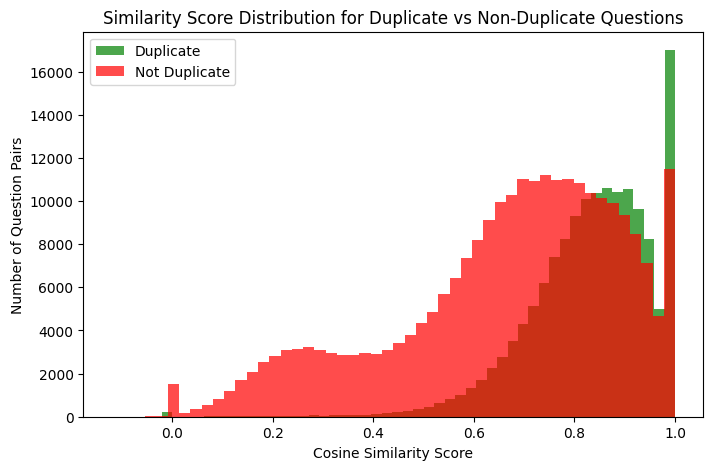

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(data_new[data_new['is_duplicate'] == 1]['similarity'], bins=50, alpha=0.7, label="Duplicate", color='green')
plt.hist(data_new[data_new['is_duplicate'] == 0]['similarity'], bins=50, alpha=0.7, label="Not Duplicate", color='red')
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Number of Question Pairs")
plt.title("Similarity Score Distribution for Duplicate vs Non-Duplicate Questions")
plt.legend()
plt.show()
